<a href="https://colab.research.google.com/github/hasnainmumtaz/COVID19-ABM/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt

# defining a class named agent, of which we will be creating multiple instances to run our simulation
class Agent:

    def __init__(self,name,x,y,speed):
        self.name = name
        self.x = x
        self.y = y
        self.speed = speed
        self.status = 'susceptible'
        self.recoverydays = 0
        # Path of the agent
        self.xlst = [x]
        self.ylst = [y]

    def move(self):
        # Updating X
        if self.x >= 0:
            if self.x > 10:
                self.x = 0
            else:
                self.x += random.choice([0,-self.speed,+self.speed])
        elif self.x < 0:
            self.x = 10

        # Updating Y
        if self.y >= 0:
            if self.y > 10:
                self.y = 0
            else:
                self.y += random.choice([0,-self.speed,+self.speed])
        elif self.y < 0:
            self.y = 10

        # Appending the list to track the movement of each agent.
        self.xlst.append(self.x)
        self.ylst.append(self.y)

    # airpi is the average interactions requried for the disease to transmit
    def infection(self,airpi):
        threshold = 1 - (1/airpi)
        check = random.random()
        if check > threshold:
            self.status = 'infected'

    def recover(self,recoveryperiod):
        self.recoverydays += 1
        if self.recoverydays >= recoveryperiod:
            self.status = 'recovered'

    def quarantine(self):
        self.speed = 0.1




# This function initializes the population by generating agents and add infected to the population as well.
def populateAgents(numofagents, numinfected, speed):
    global agentsdict
    agentsdict = {}

    infectedcount = 0
    for agent in range(numofagents):
        x = random.randrange(1,10,1)
        y = random.randrange(1,10,1)
        agentsdict[f'agent{agent}'] = Agent(f'agent{agent}',x,y,speed)

        if infectedcount < (numinfected+1):
            agentsdict[f'agent{agent}'].status = 'infected'
            infectedcount += 1
        else:
            pass

# This function gives the output of x and y coordinates of agents along with their speed
def checkAgents(adict):
    for agent in adict:
        select = adict[agent]
        print(select.x,select.y,select.speed)

# checkAgents(agentsdict)


# Defininf the function to run the simulation
def simulate(steps,agents,airpi,recoveryperiod):
    # Defininf SIR lists for plotting of a graph later
    S = []
    I = []
    R = []

    for step in range(steps):
        # defining s,i,r to keep the count of individuals in each step
        s = 0
        i = 0
        r = 0

        # This for loop uses the move function to make every agent move.
        for agent in agents:
            select = agents[agent]
            select.move()

        # This for loop checks for collision between two agents
        for agentone in agents:
            aone = agents[agentone]
            for agenttwo in agents:
                atwo = agents[agenttwo]
                if aone == atwo:
                    pass
                else:
                    if aone.x == atwo.x and aone.y == atwo.y:
                       # print(f'{aone.name} collided with {atwo.name}')
                        if aone.status == 'infected' and atwo.status == 'susceptible':
                            atwo.infection(airpi)
                            if atwo.status == 'infected':
                                #print(f'{atwo.name} is {atwo.status}, after interacting with {aone.name}')
                                pass
                            else:
                                pass

        # Recovering the infected COVID-Patients
        for agent in agents:
            select = agents[agent]
            if select.status == 'infected':
                select.recover(recoveryperiod)
            else:
                pass

        # Keeping count of the all the agents in their particular categories
        for agent in agents:
            select = agents[agent]
            if select.status == 'infected':
                i += 1
            elif select.status == 'recovered':
                r += 1
            elif select.status == 'susceptible':
                s += 1

        S.append(s)
        I.append(i)
        R.append(r)

    return S, I, R, steps

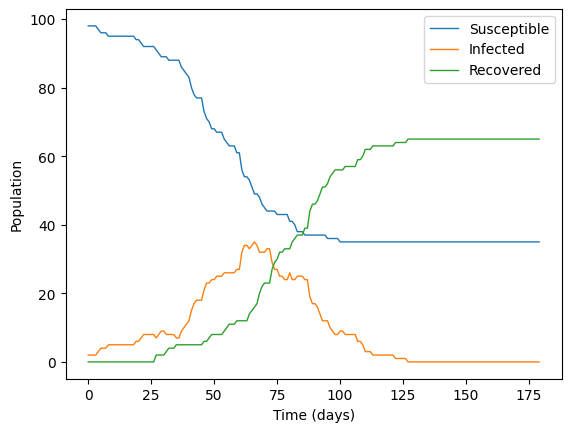

In [2]:
# Initialize the population, total agents you want in the simulation, number of infected individuals, speed of the individuals
agentsdict = {}

populateAgents(100,1,1)

suspected, infected, recovered, steps = simulate(180,agentsdict,10,28)

# Ploting the Graph for the Agents involved
x = range(0,steps)
plt.figure()
plt.plot(x, suspected, linewidth=1,label='Susceptible')
plt.plot(x, infected, linewidth=1,label='Infected')
plt.plot(x, recovered, linewidth=1,label='Recovered')
plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.show()


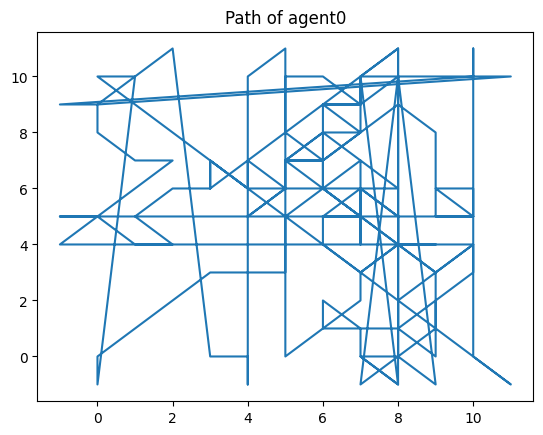

In [3]:
# Plotting a graph to see the movement of an agent in

select = agentsdict['agent0']
xi = select.xlst
yi = select.ylst
plt.title(f'Path of {select.name}')
plt.plot(xi,yi)
plt.show()